# CIFAR-10 with Keras trial runs

In this notebook, we are going to build a Convolutional Neural Network that will classify images in CIFAR-10 Database with the help of Keras.  This notebook is a sandbox of a Udacity mini-project for the Deep Learning Nanodegree. Its

<center>
__*I am using Kaggle because I can't buy a standalone desktop for Deep Learning LOL.*__</center>

## 1. Importing and loading datasets

First we want to import the keras package as this would be the one we will use to create our CNN model later. Then from there we will import the cifar10 dataset. It should download a file from the url of www.cs.toronto.edu so we should set the Internet option in the settings as _Internet connected_.

In [ ]:
import keras
from keras.datasets import cifar10

## 2. Splitting the dataset

As usual, we are going to split our data. I think they did it this way so that we can plot the data in the next code block. Did some digging in Google, `.load_data()` is a function builtin on the `datasets` module/package. I still don't quite get what the difference is.

In [ ]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

## 3. Visualizing the data

We will plot the images in the Cifar10 training set `x_train`. If I understand the code correctly, it should be plotting the first 36 images of the `x_train` split. So the outputs should be the same.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = (20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12,i+1, xticks = [], yticks = [])
    ax.imshow(np.squeeze(x_train[i]))

## 4. Rescale Images

Okay, I think I know now why the split happened first. Usually, its supposed to go load data then process it like normalization, scaling, standardization and dropping of un-needed colums. Since they wanted to plot the data first, it made sense that we do not scale directly.

In [ ]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

## 5. Data Processing

Here we will do more processing of our data. We would need to do __one-hot encode__ for our labels and we need to further split our training dataset to training and validation. If you think about it, we could actually merge item 4 and item 5 since they are both processing the data.

In [ ]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

## 6. Model Architecture

We are now starting to build the CNN model.  This is a basic CNN with 3 `'CONV-RELU-POOLING'` layers with increasing depth. This would be followed by 1 `Dense` layer that would be fully connected taking the `Flatten` input of our `CONV-RELU-POOLING` layers. Then for our `output` we want another `Dense` layer this time with a `softmax` activation function since we want our ouput to be probabilities.

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

In [ ]:
model.output_shape

## 7. Model Compilation

We will now compile our model and define our parameters for `loss` and `optimizer` and set our `metric` to accuracy since we want to minimize errors.

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

## 8. Model Training

This is the main reason why I want to use Kaggle. I would really save some time in training with a GPU.

In [ ]:
from keras.callbacks import ModelCheckpoint

# First we want to create checkpoints for training
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=100,
                 validation_data=(x_valid, y_valid), callbacks=[checkpointer],
                 verbose=2, shuffle=True)

## 9. Testing the model

In [65]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.6881


## 10. Checking some of the predictions

Here we will see what images are the model misclassifying. Maybe we can see which models are getting misclassified often.

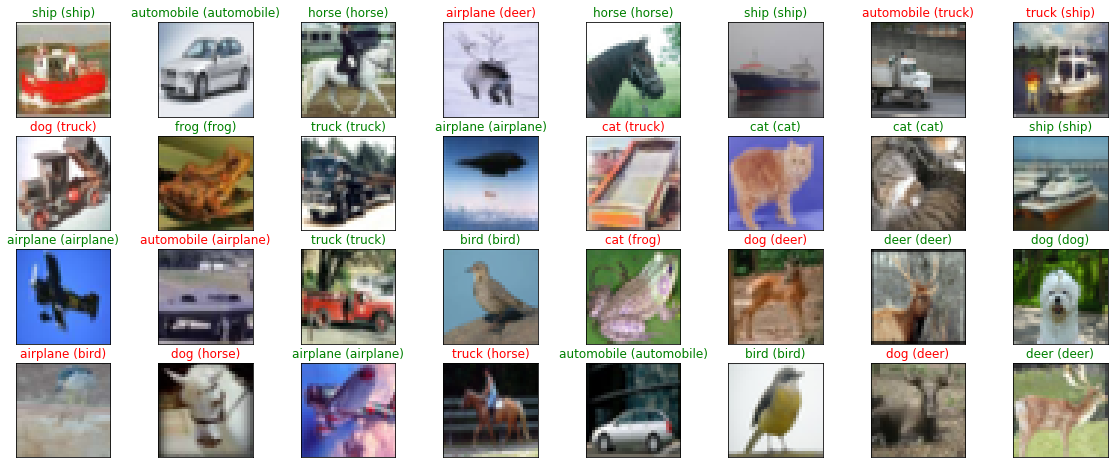

In [66]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))


In [ ]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load in 

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the "../input/" directory.
# # For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# import os
# print(os.listdir("../input"))

# # Any results you write to the current directory are saved as output.